In [1]:
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import json
import pandas as pd
import numpy as np


In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from PIL import Image
import requests 
import urllib 
import warnings
warnings.simplefilter("ignore")

In [3]:
import json
import codecs

from six.moves.urllib.request import urlopen
import numpy as np
from googletrans import Translator
translator = Translator()


In [4]:
reader = codecs.getreader("utf-8")
f = urlopen('https://raw.githubusercontent.com/longwosion/geojson-map-china/master/china.json')
geometry = json.load(reader(f))
f.close()


In [5]:
geometry['features'][0]

{'geometry': {'coordinates': [[[96.416, 42.7588],
    [96.416, 42.7148],
    [95.9766, 42.4951],
    [96.0645, 42.3193],
    [96.2402, 42.2314],
    [95.9766, 41.9238],
    [95.2734, 41.6162],
    [95.1855, 41.792],
    [94.5703, 41.4844],
    [94.043, 41.0889],
    [93.8672, 40.6934],
    [93.0762, 40.6494],
    [92.6367, 39.6387],
    [92.373, 39.3311],
    [92.373, 39.1113],
    [92.373, 39.0234],
    [90.1758, 38.4961],
    [90.3516, 38.2324],
    [90.6152, 38.3203],
    [90.5273, 37.8369],
    [91.0547, 37.4414],
    [91.3184, 37.0898],
    [90.7031, 36.7822],
    [90.791, 36.6064],
    [91.0547, 36.5186],
    [91.0547, 36.0791],
    [90.8789, 36.0352],
    [90, 36.2549],
    [89.9121, 36.0791],
    [89.7363, 36.0791],
    [89.209, 36.2988],
    [88.7695, 36.3428],
    [88.5938, 36.4746],
    [87.3633, 36.4307],
    [86.2207, 36.167],
    [86.1328, 35.8594],
    [85.6055, 35.6836],
    [85.0781, 35.7275],
    [84.1992, 35.376],
    [83.1445, 35.4199],
    [82.8809, 35.6836],
    [

In [9]:
names1=['Xinjiang','XiZang-Tibet','Inter-Mongolia','Qinghai','Sichuan','Hei Longjiang','Gansu','Yunnan','Guangxi','Hunan',
 'Shan`xi','Guangdong','Jilin','Hebei','Hubei','Guizhou','Shandong','Jiangxi','Hennan','Liaoning','Shanxi','Anhi',
 'Fujian','Zhejiang','Jiangsu','Chongqing','Ningxia','Hainan','Beijing','Tianjin','Shanghai']




In [7]:
df1=pd.read_csv('China_Region_Industries_X_Psi_2012_rows.csv',sep=';').groupby('Regions').sum()

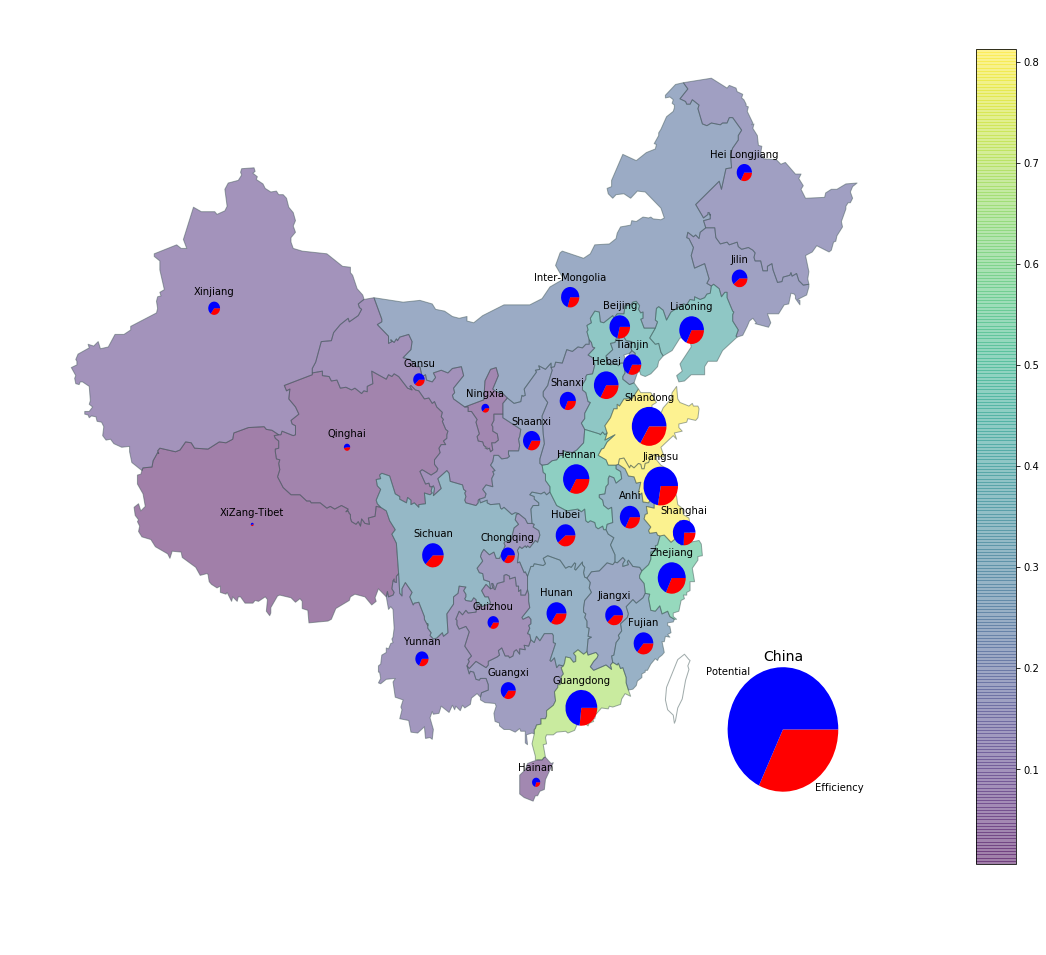

In [12]:
fig, ax = plt.subplots(figsize=(20,15))
plt.axis("off") 

ax.set_xlim(70,140)
ax.set_ylim(15,55)
#plt.imshow(image) 
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
for feature in geometry['features']:
    country_name = feature['properties']['name']
    ccn=translator.translate(country_name,dest='en').text
    if not (ccn in ['Taiwan Province','Hong Kong SAR', 'Macao Special Administrative Region']):
        ii+=1
        names.append(ccn)
        rrr=np.array(df1[df1.index==names1[ii]])[0]
        colors.append(np.sum(rrr))
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
for feature in geometry['features']:
    country_name = feature['properties']['name']
    ccn=translator.translate(country_name,dest='en').text
    if ccn in ['Taiwan Province','Hong Kong SAR', 'Macao Special Administrative Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[11][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[11][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    if nam=='Inter-Mongolia':
        l2-=0.07
    if nam=='Beijing':
        l2+=0.019
    if nam=='Hebei':
        l2-=0.02
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
    ax1=plt.axes([l1,l2,0.2,0.3])
    rrr=np.array(df1[df1.index==nam])[0]
    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
    if nam=='Shan`xi':
        ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'Shaanxi', horizontalalignment='center')
    else:    
        ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

ax1=plt.axes([0.55,0.1,0.2,0.3])
rrr=np.sum(np.array(df1),axis=0)
ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
        labels=['Efficiency','Potential'])
ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.savefig('C:/Users/inf_s/Desktop/Пратчет/Figures/pic6b.jpg', dpi=600)
plt.show() 


In [13]:
df1=pd.read_csv('China_Region_Industries_X_Psi_2007_rows.csv',sep=';').groupby('Regions').sum()

In [14]:
names1=['Xinjiang','Inter-Mongolia','Qinghai','Sichuan','Hei Longjiang','Gansu','Yunnan','Guangxi','Hunan',
 'Shan`xi','Guangdong','Jilin','Hebei','Hubei','Guizhou','Shandong','Jiangxi','Hennan','Liaoning','Shanxi','Anhi',
 'Fujian','Zhejiang','Jiangsu','Chongqing','Ningxia','Hainan','Beijing','Tianjin','Shanghai']


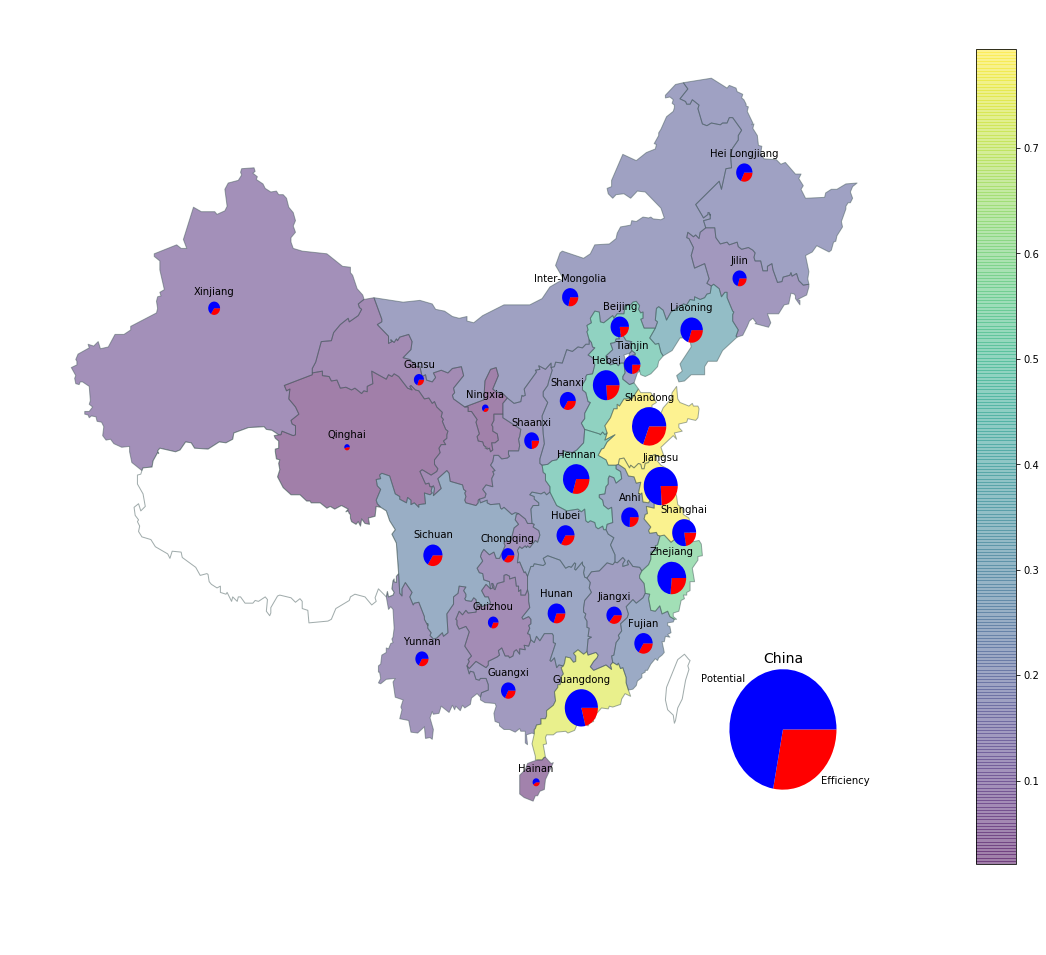

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
plt.axis("off") 

ax.set_xlim(70,140)
ax.set_ylim(15,55)
koef1=(454-7)/(116.1172663-77.0688977)
koef2=(415-248)/(28.5275198-39.9390731)


patches=[]
locs=[]
names=[]
colors=[]
ii=-1
for feature in geometry['features']:
    country_name = feature['properties']['name']
    ccn=translator.translate(country_name,dest='en').text
    if not (ccn in ['Taiwan Province','Hong Kong SAR', 'Macao Special Administrative Region',
                   'Tibet Autonomous Region']):
        ii+=1
        names.append(ccn)
        rrr=np.array(df1[df1.index==names1[ii]])[0]
        colors.append(np.sum(rrr))
        cc=np.array(feature['properties']['cp'])
        locs.append(cc)
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        patches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
p = PatchCollection(patches, edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
p.set_array(np.array(colors))
ax.add_collection(p)
plt.colorbar(p)
ppatches=[]
for feature in geometry['features']:
    country_name = feature['properties']['name']
    ccn=translator.translate(country_name,dest='en').text
    if ccn in ['Taiwan Province','Hong Kong SAR', 'Macao Special Administrative Region',
                   'Tibet Autonomous Region']:
        pole=np.array(feature['geometry']['coordinates'][0]).T
        if len(pole.shape)!=2:
            pole=np.array([pole[0].T[0],pole[1].T[0]])
        ppatches.append(Polygon(pole.T, facecolor='0.9', edgecolor='0.5',linewidth=2))
pp = PatchCollection(ppatches, color="#FFFFFF",edgecolor="#435959", alpha=0.5) #color="#25CDCD", 
ax.add_collection(pp)

koef1= (0.41-0.155)/(locs[10][0]-locs[0][0])
koef2= (0.12-0.49)/(locs[10][1]-locs[0][1])

for nam, loc in zip(names1, locs):
    l1=(loc[0]-locs[0][0])*koef1+0.155
    l2=(loc[1]-locs[0][1])*koef2+0.49
    if nam=='Inter-Mongolia':
        l2-=0.07
    if nam=='Beijing':
        l2+=0.019
    if nam=='Hebei':
        l2-=0.02
    if nam=='Gansu':
        l2+=0.01
        l1+=0.01
    if nam=='Jiangsu':
        l2+=0.012
        l1+=0.007
    ax1=plt.axes([l1,l2,0.2,0.3])
    rrr=np.array(df1[df1.index==nam])[0]
    ax1.pie(rrr*1000,labeldistance=1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False)
    if nam=='Shan`xi':
        ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'Shaanxi', horizontalalignment='center')
    else:    
        ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,nam, horizontalalignment='center')

ax1=plt.axes([0.55,0.1,0.2,0.3])
rrr=np.sum(np.array(df1),axis=0)
ax1.pie(rrr*1000,labeldistance=1.1,colors=['red','blue'], radius =np.sqrt(np.sum(rrr))/6, counterclock=False, 
        labels=['Efficiency','Potential'])
ax1.text(0,np.sqrt(np.sum(rrr))/6+0.05,'China', horizontalalignment='center',fontsize=14)
plt.savefig('C:/Users/inf_s/Desktop/Пратчет/Figures/pic6a.jpg', dpi=600)
plt.show() 
